In [1]:
# The following is from "big run"
import sys
sys.path.append('..')
from lib import *
import pandas as pd
import numpy as np

# Setup
lsa_np = np.load('../data/parsed/lsa_output.npy')

metadata = pd.read_pickle('../data/parsed/pickles/pickled_data_test.pickle')
metadata = metadata.loc[metadata['Scenario'] == '401']
metadata = metadata.reset_index(drop=True)

lsa_df = pd.DataFrame(lsa_np)

df = pd.concat([metadata, lsa_df], axis=1, join_axes=[metadata.index])
df = df.loc[df['Label'] != '-1']
df = df.reset_index(drop=True)

cat_features = ['To','From']
features = list(range(100))
features.extend(cat_features + ['Date'])

df = df[features + ['Label'] + ['ID']]

In [2]:
# optimal params
n_trees = 32
tree_depth = 70
random_seed = 42
n_max_features = 90
cat_features = ['To', 'From']

In [3]:
regular_increment(df, n_trees, tree_depth, random_seed, n_max_features, cat_features)

(0.5142857142857142, 0.9473684210526315, 0.82, 0.6666666666666666)
(0.6, 0.8076923076923077, 0.81, 0.6885245901639345)
(0.7714285714285715, 0.8181818181818182, 0.86, 0.7941176470588236)
(0.8, 0.6829268292682927, 0.8, 0.736842105263158)
(0.7142857142857143, 0.6944444444444444, 0.79, 0.7042253521126761)
(0.7428571428571429, 0.6666666666666666, 0.78, 0.7027027027027027)


In [3]:
committee_increment(df, n_trees, tree_depth, random_seed, n_max_features, cat_features)

(0.5142857142857142, 0.9473684210526315, 0.82, 0.6666666666666666)
(0.7428571428571429, 0.6842105263157895, 0.79, 0.7123287671232877)
(0.8, 0.6829268292682927, 0.8, 0.736842105263158)
(0.5714285714285714, 0.7407407407407407, 0.78, 0.6451612903225806)
(0.6857142857142857, 0.6666666666666666, 0.77, 0.676056338028169)
(0.6857142857142857, 0.75, 0.81, 0.7164179104477612)


In [6]:
homogeneous_increment(df, n_trees, tree_depth, random_seed, n_max_features, cat_features)

(0.5142857142857142, 0.9473684210526315, 0.82, 0.6666666666666666)
(0.9142857142857143, 0.6956521739130435, 0.83, 0.7901234567901234)
(0.8, 0.6511627906976745, 0.78, 0.7179487179487181)
(0.7714285714285715, 0.6585365853658537, 0.78, 0.7105263157894737)
(0.7428571428571429, 0.7222222222222222, 0.81, 0.732394366197183)


In [9]:
most_confident_increment(df, n_trees, tree_depth, random_seed, n_max_features, cat_features)

(0.5142857142857142, 0.9473684210526315, 0.82, 0.6666666666666666)
(0.11428571428571428, 0.5714285714285714, 0.66, 0.19047619047619044)
(0.5428571428571428, 0.6129032258064516, 0.72, 0.5757575757575757)
(0.5142857142857142, 0.6666666666666666, 0.74, 0.5806451612903226)
(0.6571428571428571, 0.8214285714285714, 0.83, 0.73015873015873)
(0.6285714285714286, 0.6875, 0.77, 0.6567164179104478)


In [3]:
non_incremental(df, n_trees, tree_depth, random_seed, n_max_features, cat_features)

(0.5142857142857142, 0.9473684210526315, 0.82, 0.6666666666666666)
(0.7714285714285715, 0.7941176470588235, 0.85, 0.782608695652174)
(0.7714285714285715, 0.84375, 0.87, 0.8059701492537314)
(0.6857142857142857, 0.8, 0.83, 0.7384615384615385)
when splitting categorically, no best address found: [258 258 403 363 416]
(0.7428571428571429, 0.7878787878787878, 0.84, 0.7647058823529412)
(0.7142857142857143, 0.7352941176470589, 0.81, 0.7246376811594202)


In [4]:
regular_incremental_stats = [(0.5142857142857142, 0.9473684210526315, 0.82, 0.6666666666666666),
(0.6, 0.8076923076923077, 0.81, 0.6885245901639345),
(0.7714285714285715, 0.8181818181818182, 0.86, 0.7941176470588236),
(0.8, 0.6829268292682927, 0.8, 0.736842105263158),
(0.7142857142857143, 0.6944444444444444, 0.79, 0.7042253521126761),
(0.7428571428571429, 0.6666666666666666, 0.78, 0.7027027027027027)]
committee_incremental_stats = [(0.5142857142857142, 0.9473684210526315, 0.82, 0.6666666666666666),
(0.7428571428571429, 0.6842105263157895, 0.79, 0.7123287671232877),
(0.8, 0.6829268292682927, 0.8, 0.736842105263158),
(0.5714285714285714, 0.7407407407407407, 0.78, 0.6451612903225806),
(0.6857142857142857, 0.6666666666666666, 0.77, 0.676056338028169),
(0.6857142857142857, 0.75, 0.81, 0.7164179104477612)]
homogeneous_incremental_stats = [(0.5142857142857142, 0.9473684210526315, 0.82, 0.6666666666666666),
(0.9142857142857143, 0.6956521739130435, 0.83, 0.7901234567901234),
(0.8, 0.6511627906976745, 0.78, 0.7179487179487181),
(0.7714285714285715, 0.6585365853658537, 0.78, 0.7105263157894737),
(0.7428571428571429, 0.7222222222222222, 0.81, 0.732394366197183),
                                (0.7428571428571429, 0.7222222222222222, 0.81, 0.732394366197183)]
most_confident_incremental_stats = [(0.5142857142857142, 0.9473684210526315, 0.82, 0.6666666666666666),
(0.11428571428571428, 0.5714285714285714, 0.66, 0.19047619047619044),
(0.5428571428571428, 0.6129032258064516, 0.72, 0.5757575757575757),
(0.5142857142857142, 0.6666666666666666, 0.74, 0.5806451612903226),
(0.6571428571428571, 0.8214285714285714, 0.83, 0.73015873015873),
(0.6285714285714286, 0.6875, 0.77, 0.6567164179104478)]
non_incremental_baseline = [(0.5142857142857142, 0.9473684210526315, 0.82, 0.6666666666666666),
(0.7714285714285715, 0.7941176470588235, 0.85, 0.782608695652174),
(0.7714285714285715, 0.84375, 0.87, 0.8059701492537314),
(0.6857142857142857, 0.8, 0.83, 0.7384615384615385),
(0.7428571428571429, 0.7878787878787878, 0.84, 0.7647058823529412),
(0.7142857142857143, 0.7352941176470589, 0.81, 0.7246376811594202)]

# Plots with constant y axis range [0, 1]

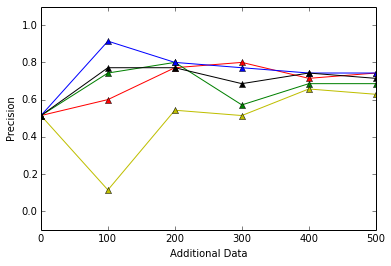

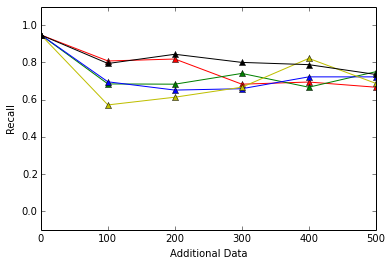

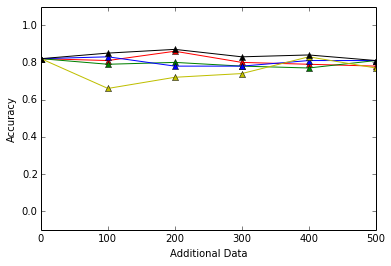

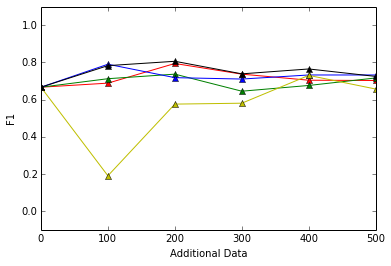

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pylab
# import matplotlib.pyplot.figlegend

stat_types = ['Precision', 'Recall', 'Accuracy', 'F1']

for i in range(len(stat_types)):
    x = range(0,600,100)
    
    vanilla = [x[i] for x in regular_incremental_stats]
    committee = [x[i] for x in committee_incremental_stats]
    homogeneous = [x[i] for x in homogeneous_incremental_stats]
    most_confident = [x[i] for x in most_confident_incremental_stats]
    non_incremental = [x[i] for x in non_incremental_baseline]

    fig=plt.figure()
    ax=fig.add_subplot(111)

    ax.plot(x, vanilla, marker="^", label="Incremental", color='r')
    ax.plot(x, committee, marker="^", label="Committee", color='g')
    ax.plot(x, homogeneous, marker = "^", label="Homogeneous", color='b')
    ax.plot(x, most_confident, marker = "^", label="Most Confident", color='y')
    ax.plot(x, non_incremental, marker = "^", label="Non-Incremental", color='k')
    
    
#     plt.legend(loc=3)
    plt.ylim([-0.1, 1.1])
    plt.xlabel('Additional Data')
    plt.ylabel(stat_types[i])
    plt.draw()
    plt.show()

    
    

# Plots with fitted y axis

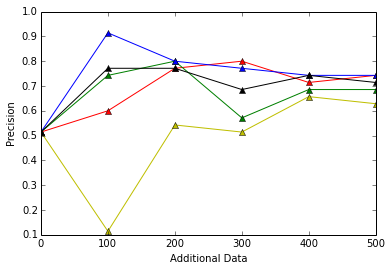

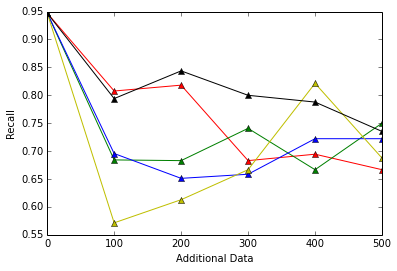

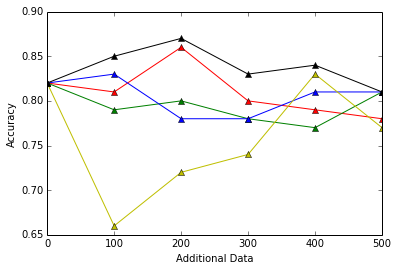

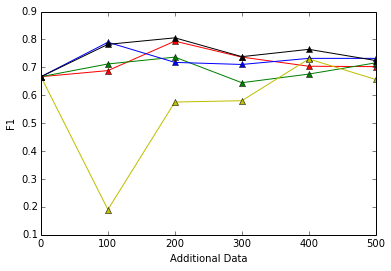

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pylab
# import matplotlib.pyplot.figlegend

stat_types = ['Precision', 'Recall', 'Accuracy', 'F1']

for i in range(len(stat_types)):
    x = range(0,600,100)
    
    vanilla = [x[i] for x in regular_incremental_stats]
    committee = [x[i] for x in committee_incremental_stats]
    homogeneous = [x[i] for x in homogeneous_incremental_stats]
    most_confident = [x[i] for x in most_confident_incremental_stats]
    non_incremental = [x[i] for x in non_incremental_baseline]

    fig=plt.figure()
    ax=fig.add_subplot(111)

    ax.plot(x, vanilla, marker="^", label="Incremental", color='r')
    ax.plot(x, committee, marker="^", label="Committee", color='g')
    ax.plot(x, homogeneous, marker = "^", label="Homogeneous", color='b')
    ax.plot(x, most_confident, marker = "^", label="Most Confident", color='y')
    ax.plot(x, non_incremental, marker = "^", label="Non-Incremental", color='k')
    
    
#     plt.legend(loc=3)
#     plt.ylim([-0.1, 1.1])
    plt.xlabel('Additional Data')
    plt.ylabel(stat_types[i])
    plt.draw()
    plt.show()